In [4]:
# Ruta al archivo de texto
file_path = '/content/0.fqbqx5y9y1c0.8hw801u28arbank-names-RETO_DS_AS.txt'

# Leer el archivo completo como una cadena
with open(file_path, 'r') as file:
    data = file.read()

# Mostrar el contenido del archivo
print(data)

Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
3. Past Usage:

  The full dataset was described and analyzed in:

  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European S

	4.	Incluye las librerías que consideres adecuadas y carga los datos del archivo en una variable llamada “data”.

In [6]:
import pandas as pd

# Ruta al archivo CSV
file_path = '/content/0.xozu243mego0.145c4n51y90bbank_marketing_RETO_DS_AS.csv'

# Cargar el archivo CSV en un DataFrame
data = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame
print(data.head())

   age            job  marital  education default  balance housing loan  \
0   31  self-employed  married   tertiary      no     2666      no   no   
1   29     unemployed   single    unknown      no     1584      no   no   
2   41    blue-collar  married  secondary      no     2152     yes   no   
3   50    blue-collar  married  secondary      no       84     yes   no   
4   40         admin.  married  secondary      no        0      no   no   

    contact  day month  duration  campaign  pdays  previous poutcome    y  
0  cellular   10   nov       318         2     97         6  success  yes  
1  cellular    6   sep       245         1     -1         0  unknown  yes  
2  cellular   17   nov       369         1     -1         0  unknown   no  
3  cellular   17   jul        18         8     -1         0  unknown   no  
4  cellular   28   jul       496         2    182        11  success  yes  


5.	Obtener la información de dicha base de datos que incluya el número de registros, el total de variables, el tipo de cada variable, la cantidad de datos perdidos de cada variable en caso de que existan.

In [7]:
# Número de registros y total de variables
num_records = data.shape[0]
num_variables = data.shape[1]

print(f"Número de registros: {num_records}")
print(f"Total de variables: {num_variables}")

# Tipo de cada variable
variable_types = data.dtypes
print("\nTipo de cada variable:")
print(variable_types)

# Cantidad de datos perdidos de cada variable
missing_data = data.isnull().sum()
print("\nCantidad de datos perdidos de cada variable:")
print(missing_data)

# Información resumida del DataFrame
print("\nInformación del DataFrame:")
data.info()

Número de registros: 9000
Total de variables: 17

Tipo de cada variable:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Cantidad de datos perdidos de cada variable:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   jo

6.	Transforma las variables categóricas de manera que puedan ser tratadas numéricamente. Justifica si utilizas LabelEncoder o OneHotEcoder.

In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Supongamos que el DataFrame se llama 'data' y ya está cargado

# Variables categóricas
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
target_column = 'y'

# Aplicar OneHotEncoder a las variables categóricas
onehotencoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' para evitar la trampa de las variables ficticias
encoded_columns = onehotencoder.fit_transform(data[categorical_columns])

# Crear un DataFrame con las columnas codificadas
encoded_df = pd.DataFrame(encoded_columns, columns=onehotencoder.get_feature_names_out(categorical_columns))

# Concatenar el DataFrame original (sin las columnas categóricas originales) con las columnas codificadas
data = data.drop(columns=categorical_columns)
data = pd.concat([data, encoded_df], axis=1)

# Aplicar LabelEncoder a la variable objetivo
labelencoder = LabelEncoder()
data[target_column] = labelencoder.fit_transform(data[target_column])

# Mostrar las primeras filas del DataFrame transformado
print(data.head())

   age  balance  day  duration  campaign  pdays  previous  y  job_blue-collar  \
0   31     2666   10       318         2     97         6  1              0.0   
1   29     1584    6       245         1     -1         0  1              0.0   
2   41     2152   17       369         1     -1         0  0              1.0   
3   50       84   17        18         8     -1         0  0              1.0   
4   40        0   28       496         2    182        11  1              0.0   

   job_entrepreneur  ...  month_jul  month_jun  month_mar  month_may  \
0               0.0  ...        0.0        0.0        0.0        0.0   
1               0.0  ...        0.0        0.0        0.0        0.0   
2               0.0  ...        0.0        0.0        0.0        0.0   
3               0.0  ...        1.0        0.0        0.0        0.0   
4               0.0  ...        1.0        0.0        0.0        0.0   

   month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0       

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


7.	Transforma las variables numéricas en los casos que se tenga algún tipo de sesgo.

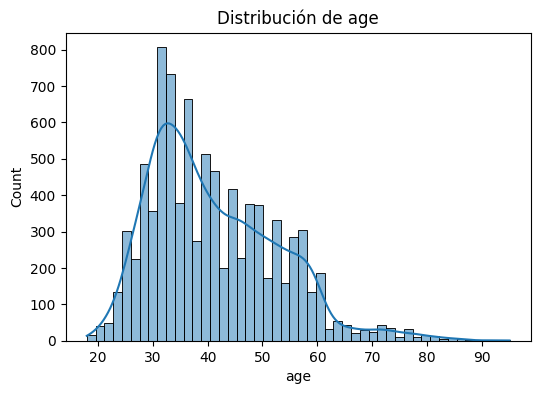

age skewness: 0.801429198170957


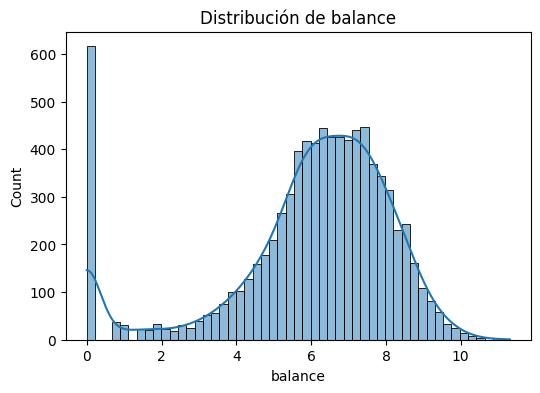

balance skewness: nan


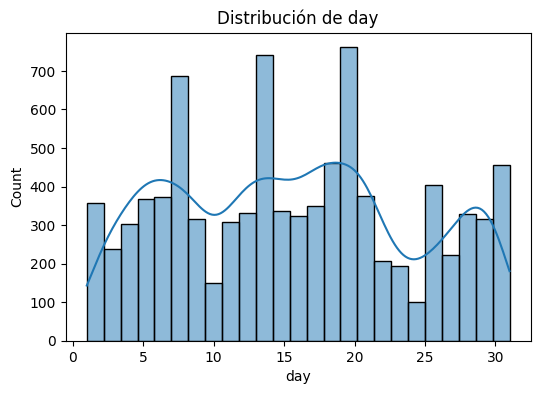

day skewness: 0.11731504466354789


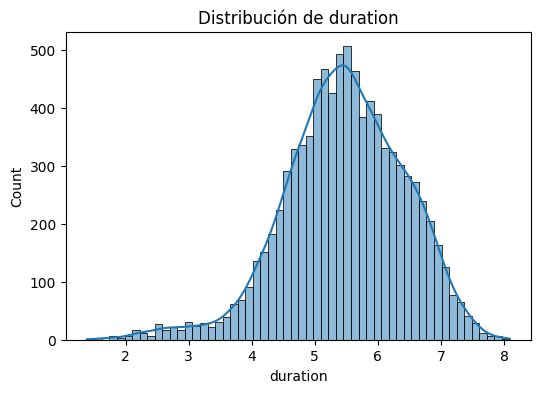

duration skewness: -0.4493030712235837


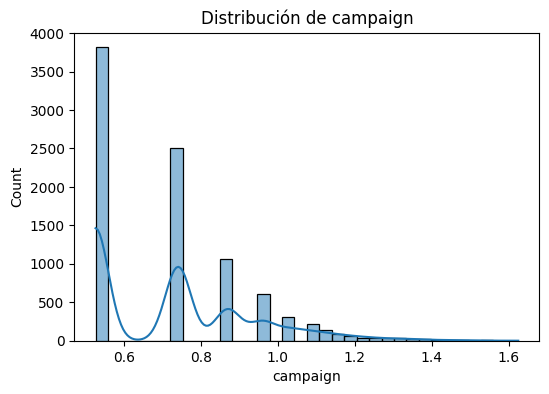

campaign skewness: 0.8485782281258284


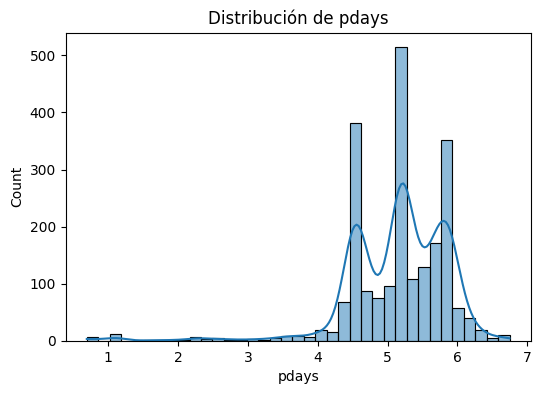

pdays skewness: nan


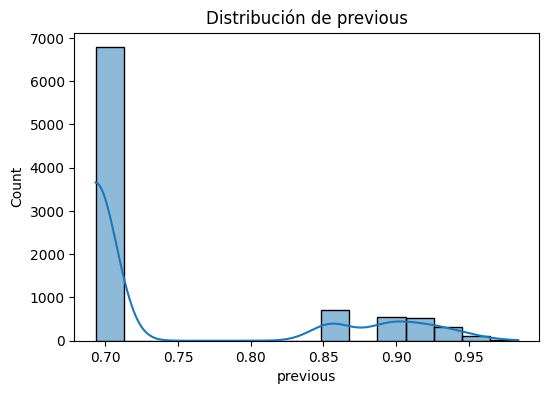

previous skewness: 1.2884104023573
         age   balance       day  duration  campaign     pdays  previous  y  \
0  -0.817481  0.745735 -0.606202  0.326064  0.406055 -0.736282  1.256799  1   
4  -0.117817 -3.065008  1.568352  0.857216  0.406055  0.108893  1.774384  1   
7  -1.206183  0.372658 -1.451862  0.554441  0.406055 -0.750162  1.073970  1   
11 -0.817481  1.666087 -0.122968  1.343729 -0.834172  0.048399  0.481600  1   
19  0.815067  0.071152  1.568352  0.569858  1.664603 -0.792679 -1.244413  1   

    job_blue-collar  job_entrepreneur  ...  month_jul  month_jun  month_mar  \
0               0.0               0.0  ...        0.0        0.0        0.0   
4               0.0               0.0  ...        1.0        0.0        0.0   
7               0.0               0.0  ...        0.0        1.0        0.0   
11              0.0               0.0  ...        0.0        0.0        0.0   
19              0.0               0.0  ...        0.0        0.0        0.0   

    month_may  

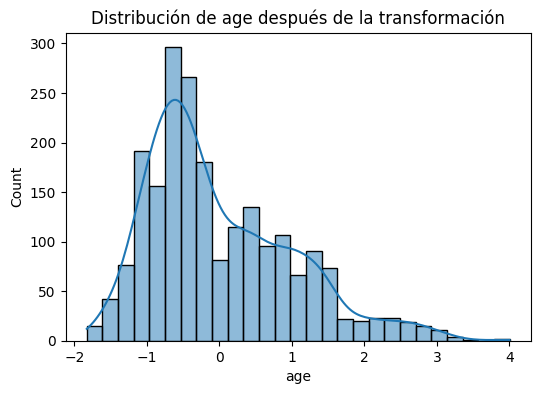

age skewness después de la transformación: 0.8888076310730801


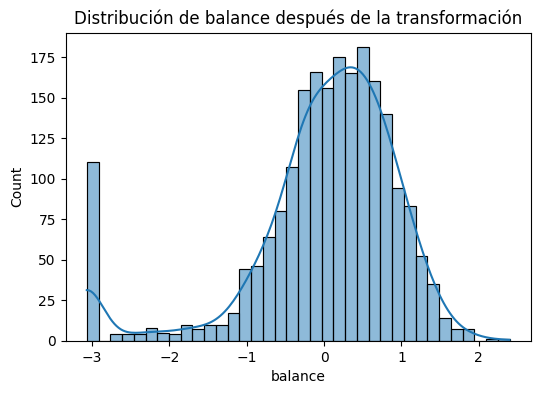

balance skewness después de la transformación: -1.4703543455865975


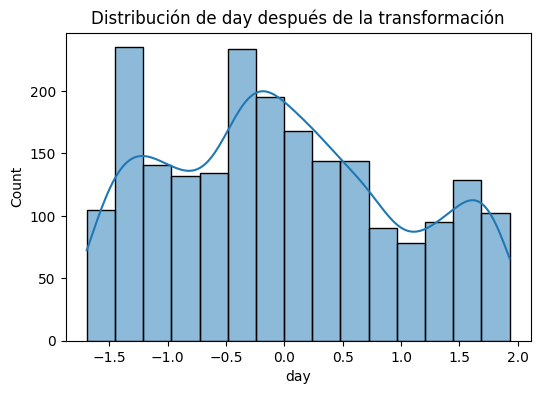

day skewness después de la transformación: 0.2057212688318241


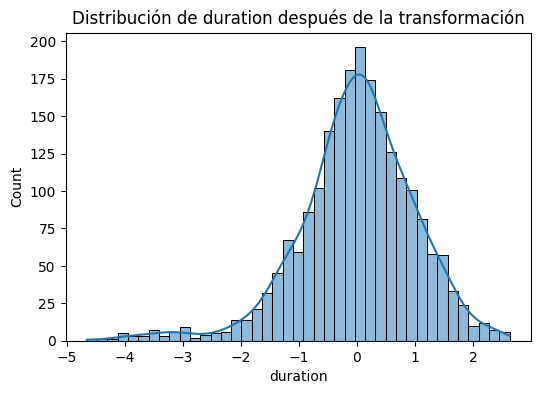

duration skewness después de la transformación: -0.7133407727944303


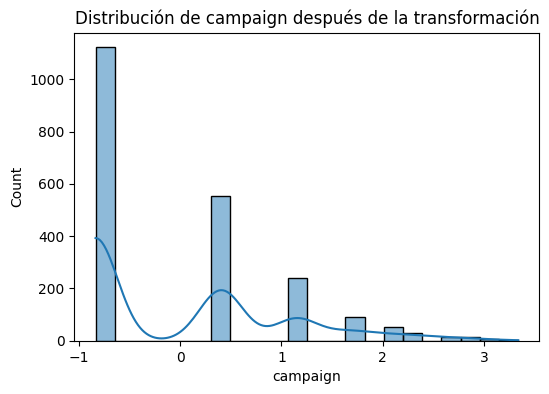

campaign skewness después de la transformación: 0.874577324816831


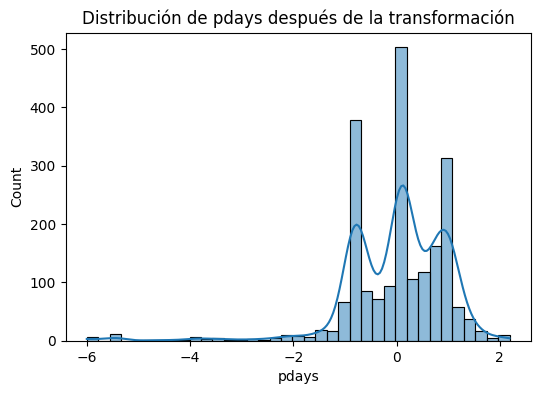

pdays skewness después de la transformación: -2.0338539675318894


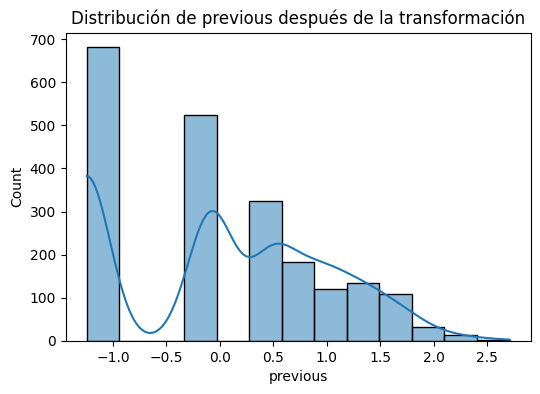

previous skewness después de la transformación: 0.08974013762780339


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Supongamos que el DataFrame se llama 'data' y ya está cargado

# Identificar las variables numéricas
numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Visualizar la distribución de las variables numéricas
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()
    print(f'{col} skewness: {data[col].skew()}')

# Aplicar transformaciones a las variables sesgadas
for col in numeric_columns:
    if data[col].skew() > 1:  # Transformación logarítmica para sesgo positivo fuerte
        # Añadir una constante para evitar log de cero y negativos
        min_val = data[col].min()
        if min_val <= 0:
            data[col] = data[col] - min_val + 1
        data[col] = np.log1p(data[col])
    elif data[col].skew() < -1:  # Transformación exponencial para sesgo negativo fuerte
        data[col] = np.expm1(data[col])

# Eliminar valores infinitos
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Normalización/Estandarización
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Mostrar las primeras filas del DataFrame transformado
print(data.head())

# Verificar la distribución después de las transformaciones
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribución de {col} después de la transformación')
    plt.show()
    print(f'{col} skewness después de la transformación: {data[col].skew()}')




8.	Considera la variable “y” como la variable de salida y el resto de las variables como las variables de entrada.

In [18]:
import pandas as pd

# Mostrar los nombres de las columnas en el DataFrame
print("Columnas en el DataFrame:")
print(data.columns.tolist())

# Verificar las variables categóricas
print("\nVerificación de variables categóricas:")
missing_categorical_columns = [col for col in categorical_columns if col not in data.columns]
if missing_categorical_columns:
    print(f"Las siguientes columnas categóricas están faltando en el DataFrame: {missing_categorical_columns}")
else:
    print("Todas las columnas categóricas están presentes en el DataFrame.")


Columnas en el DataFrame:
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']

Verificación de variables categóricas:
Las siguientes columnas categóricas están faltando en el DataFrame: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identificar las variables numéricas
numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Variables categóricas ya están en formato de variables dummy
categorical_columns = [col for col in data.columns if col.startswith(('job_', 'marital_', 'education_', 'default_', 'housing_', 'loan_', 'contact_', 'month_', 'poutcome_'))]

# Separar la variable de salida 'y'
y = data['y']

# Separar las variables de entrada
X = data.drop(columns=['y'])

# Aplicar transformaciones a las variables numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Crear el preprocesador solo para las variables numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns)
    ],
    remainder='passthrough'  # Dejar pasar las variables categóricas dummy sin cambios
)

# Aplicar transformaciones a las variables de entrada
X_transformed = preprocessor.fit_transform(X)

# Mostrar las primeras filas del DataFrame transformado y la variable de salida
print("Características (X) después de la transformación:")
print(X_transformed[:5])
print("\nVariable de salida (y):")
print(y.head())


Características (X) después de la transformación:
[[-0.81748073  0.74573504 -0.60620195  0.32606429  0.40605543 -0.73628202
   1.25679937  0.          0.          0.          0.          0.
   1.          0.          0.          0.          0.          0.
   1.          0.          0.          1.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   1.          0.          0.          0.          1.          0.        ]
 [-0.11781727 -3.06500811  1.5683515   0.85721554  0.40605543  0.108893
   1.7743844   0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   1.          0.          1.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          1.          0.          0.          0.
   0.          0.          0.          0.          1.          0.    

9.	Particiona los datos en los conjuntos de entrenamiento, validación y prueba en 60%, 20% y 20%, respectivamente.

In [20]:
from sklearn.model_selection import train_test_split

# Primero, dividir el DataFrame en conjunto de entrenamiento (60%) y conjunto de prueba (40%)
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.4, random_state=42
)

# Luego, dividir el conjunto de prueba en conjunto de validación (50% de los datos restantes) y conjunto de prueba (50% de los datos restantes)
X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42
)

# Mostrar el tamaño de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de validación: {X_val.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")

Tamaño del conjunto de entrenamiento: 1275
Tamaño del conjunto de validación: 425
Tamaño del conjunto de prueba: 426


10.	Aplica el modelo Regresión Logística en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor resultado.

In [41]:
from sklearn.metrics import classification_report

# Paso 1: Entrenar el modelo de Regresión Logística inicial
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Validar el modelo con el conjunto de validación
y_val_pred = logreg.predict(X_val)

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Matriz de Confusión del modelo inicial:")
print(conf_matrix)

# Calcular y mostrar la exactitud
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Exactitud del modelo inicial: {accuracy:.4f}")

# Paso 2: Ajustar los parámetros del modelo utilizando GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y el mejor modelo
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
print(f"Mejor exactitud con los mejores parámetros: {grid_search.best_score_:.4f}")

# Paso 3: Validar el mejor modelo
best_logreg = grid_search.best_estimator_
y_val_pred_best = best_logreg.predict(X_val)

# Calcular y mostrar la matriz de confusión para el mejor modelo
conf_matrix_best = confusion_matrix(y_val, y_val_pred_best)
print("Matriz de Confusión con los mejores parámetros:")
print(conf_matrix_best)

# Calcular y mostrar la exactitud para el mejor modelo
accuracy_best = accuracy_score(y_val, y_val_pred_best)
print(f"Exactitud del mejor modelo: {accuracy_best:.4f}")

# Paso 4: Reporte de Clasificación para el mejor modelo
print("\nReporte de Clasificación del mejor modelo:")
print(classification_report(y_val, y_val_pred_best))


Matriz de Confusión del modelo inicial:
[[38 21]
 [11 94]]
Exactitud del modelo inicial: 0.8049


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Mejores parámetros encontrados:
{'C': 0.1, 'solver': 'lbfgs'}
Mejor exactitud con los mejores parámetros: 0.8252
Matriz de Confusión con los mejores parámetros:
[[38 21]
 [ 9 96]]
Exactitud del mejor modelo: 0.8171

Reporte de Clasificación del mejor modelo:
              precision    recall  f1-score   support

           0       0.81      0.64      0.72        59
           1       0.82      0.91      0.86       105

    accuracy                           0.82       164
   macro avg       0.81      0.78      0.79       164
weighted avg       0.82      0.82      0.81       164



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


11.	Aplica el modelo Red Neuronal en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor modelo, entre ellos el número de neuronas y capas ocultas.

In [23]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Convertir etiquetas a valores numéricos si es necesario
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

# Paso 1: Construcción del modelo de Red Neuronal
def create_model(input_dim, num_neurons, num_hidden_layers):
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=input_dim, activation='relu'))

    for _ in range(num_hidden_layers - 1):
        model.add(Dense(num_neurons, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Parámetros iniciales
input_dim = X_train.shape[1]
num_neurons = 64
num_hidden_layers = 2

# Crear y entrenar el modelo
model = create_model(input_dim, num_neurons, num_hidden_layers)

# Utilizar EarlyStopping para evitar el sobreentrenamiento
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train_encoded,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val_encoded),
                    callbacks=[early_stopping])

# Paso 2: Validar el modelo
y_val_pred_probs = model.predict(X_val)
y_val_pred = (y_val_pred_probs > 0.5).astype(int)  # Convertir probabilidades a etiquetas

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_val_encoded, y_val_pred)
print("Matriz de Confusión del modelo de Red Neuronal:")
print(conf_matrix)

# Calcular y mostrar la exactitud
accuracy = accuracy_score(y_val_encoded, y_val_pred)
print(f"Exactitud del modelo de Red Neuronal: {accuracy:.4f}")

# Paso 3: Ajustar los parámetros del modelo
# Puedes hacer una búsqueda de hiperparámetros usando GridSearchCV en una forma compatible
# O ajusta manualmente los parámetros y prueba diferentes configuracio


Epoch 1/50
40/40 [==============================] - 5s 23ms/step - loss: 0.6047 - accuracy: 0.6745 - val_loss: 0.5172 - val_accuracy: 0.7953
Epoch 2/50
40/40 [==============================] - 0s 7ms/step - loss: 0.4467 - accuracy: 0.8212 - val_loss: 0.4223 - val_accuracy: 0.8165
Epoch 3/50
40/40 [==============================] - 0s 6ms/step - loss: 0.3846 - accuracy: 0.8384 - val_loss: 0.4043 - val_accuracy: 0.8212
Epoch 4/50
40/40 [==============================] - 1s 15ms/step - loss: 0.3606 - accuracy: 0.8518 - val_loss: 0.3995 - val_accuracy: 0.8329
Epoch 5/50
40/40 [==============================] - 1s 15ms/step - loss: 0.3469 - accuracy: 0.8580 - val_loss: 0.3981 - val_accuracy: 0.8329
Epoch 6/50
40/40 [==============================] - 0s 7ms/step - loss: 0.3348 - accuracy: 0.8635 - val_loss: 0.3985 - val_accuracy: 0.8329
Epoch 7/50
40/40 [==============================] - 0s 7ms/step - loss: 0.3239 - accuracy: 0.8714 - val_loss: 0.4020 - val_accuracy: 0.8424
Epoch 8/50
40/40 

In [25]:
!pip install tensorflow


In [27]:
!pip install tensorflow

In [30]:
!pip install tensorflow

In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelBinarizer

# Función para crear el modelo
def create_model(num_neurons=64, num_hidden_layers=2):
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=X_train.shape[1], activation='relu'))

    for _ in range(num_hidden_layers - 1):
        model.add(Dense(num_neurons, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Convertir los datos a formato adecuado
y_train_encoded = LabelBinarizer().fit_transform(y_train)
y_val_encoded = LabelBinarizer().fit_transform(y_val)

# Preparar datos
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)

# Ajuste manual de hiperparámetros
param_grid = {
    'num_neurons': [32, 64, 128],
    'num_hidden_layers': [1, 2, 3]
}

def fit_and_score_model(num_neurons, num_hidden_layers):
    model = create_model(num_neurons=num_neurons, num_hidden_layers=num_hidden_layers)
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)
    y_val_pred_probs = model.predict(X_val)
    y_val_pred = (y_val_pred_probs > 0.5).astype(int)
    accuracy = accuracy_score(y_val, y_val_pred)
    return accuracy

best_accuracy = 0
best_params = {}

for num_neurons in param_grid['num_neurons']:
    for num_hidden_layers in param_grid['num_hidden_layers']:
        accuracy = fit_and_score_model(num_neurons, num_hidden_layers)
        print(f"Probar parámetros: num_neurons={num_neurons}, num_hidden_layers={num_hidden_layers} - Exactitud: {accuracy:.4f}")
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'num_neurons': num_neurons, 'num_hidden_layers': num_hidden_layers}

print("Mejores parámetros encontrados:")
print(best_params)
print(f"Mejor exactitud con los mejores parámetros: {best_accuracy:.4f}")

# Evaluar el mejor modelo
best_model = create_model(num_neurons=best_params['num_neurons'], num_hidden_layers=best_params['num_hidden_layers'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

y_val_pred_probs_best = best_model.predict(X_val)
y_val_pred_best = (y_val_pred_probs_best > 0.5).astype(int)

conf_matrix_best = confusion_matrix(y_val, y_val_pred_best)
print("Matriz de Confusión con los mejores parámetros:")
print(conf_matrix_best)

best_accuracy = 0
best_params = {}

for num_neurons in param_grid['num_neurons']:
    for num_hidden_layers in param_grid['num_hidden_layers']:
        accuracy = fit_and_score_model(num_neurons, num_hidden_layers)
        print(f"Probar parámetros: num_neurons={num_neurons}, num_hidden_layers={num_hidden_layers} - Exactitud: {accuracy:.4f}")
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'num_neurons': num_neurons, 'num_hidden_layers': num_hidden_layers}

print("Mejores parámetros encontrados:")
print(best_params)
print(f"Mejor exactitud con los mejores parámetros: {best_accuracy:.4f}")

# Evaluar el mejor modelo
best_model = create_model(num_neurons=best_params['num_neurons'], num_hidden_layers=best_params['num_hidden_layers'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

y_val_pred_probs_best = best_model.predict(X_val)
y_val_pred_best = (y_val_pred_probs_best > 0.5).astype(int)

conf_matrix_best = confusion_matrix(y_val, y_val_pred_best)
print("Matriz de Confusión con los mejores parámetros:")
print(conf_matrix_best)

accuracy_best = accuracy_score(y_val, y_val_pred_best)
print(f"Exactitud del mejor modelo: {accuracy_best:.4f}")


6/6 [==============================] - 0s 2ms/step
Probar parámetros: num_neurons=32, num_hidden_layers=1 - Exactitud: 0.8110
6/6 [==============================] - 0s 2ms/step
Probar parámetros: num_neurons=32, num_hidden_layers=2 - Exactitud: 0.8110
6/6 [==============================] - 0s 2ms/step
Probar parámetros: num_neurons=32, num_hidden_layers=3 - Exactitud: 0.8049
6/6 [==============================] - 0s 3ms/step
Probar parámetros: num_neurons=64, num_hidden_layers=1 - Exactitud: 0.8232
6/6 [==============================] - 0s 3ms/step
Probar parámetros: num_neurons=64, num_hidden_layers=2 - Exactitud: 0.8110
6/6 [==============================] - 0s 2ms/step
Probar parámetros: num_neurons=64, num_hidden_layers=3 - Exactitud: 0.7988
6/6 [==============================] - 0s 3ms/step
Probar parámetros: num_neurons=128, num_hidden_layers=1 - Exactitud: 0.8293
6/6 [==============================] - 0s 2ms/step
Probar parámetros: num_neurons=128, num_hidden_layers=2 - Exactitu

12.	Selecciona el mejor modelo encontrado en los incisos anteriores y utiliza el conjunto de prueba para obtener el desempeño final del modelo y su matriz de confusión.

In [42]:
# Evaluar el mejor modelo de Regresión Logística en el conjunto de prueba
y_test_pred_log_reg = best_logreg.predict(X_test)
conf_matrix_test_log_reg = confusion_matrix(y_test, y_test_pred_log_reg)
accuracy_test_log_reg = accuracy_score(y_test, y_test_pred_log_reg)

print("Matriz de Confusión en el conjunto de prueba (Regresión Logística):")
print(conf_matrix_test_log_reg)
print(f"Exactitud del modelo en el conjunto de prueba (Regresión Logística): {accuracy_test_log_reg:.4f}")

# Evaluar el mejor modelo de Red Neuronal en el conjunto de prueba
y_test_pred_probs_nn = best_model.predict(X_test)
y_test_pred_nn = (y_test_pred_probs_nn > 0.5).astype(int)

conf_matrix_test_nn = confusion_matrix(y_test, y_test_pred_nn)
accuracy_test_nn = accuracy_score(y_test, y_test_pred_nn)

print("Matriz de Confusión en el conjunto de prueba (Red Neuronal):")
print(conf_matrix_test_nn)
print(f"Exactitud del modelo en el conjunto de prueba (Red Neuronal): {accuracy_test_nn:.4f}")


Matriz de Confusión en el conjunto de prueba (Regresión Logística):
[[115  45]
 [ 29 237]]
Exactitud del modelo en el conjunto de prueba (Regresión Logística): 0.8263
14/14 [==============================] - 0s 3ms/step
Matriz de Confusión en el conjunto de prueba (Red Neuronal):
[[120  40]
 [ 32 234]]
Exactitud del modelo en el conjunto de prueba (Red Neuronal): 0.8310


Conclusión Final:
La Red Neuronal tiene un rendimiento general ligeramente mejor en términos de exactitud y número de Verdaderos Negativos y Falsos Positivos, lo que puede ser una ventaja en aplicaciones donde minimizar los errores en la identificación de la clase negativa es crucial.
La Regresión Logística ofrece una leve ventaja en la identificación de casos positivos y tiene menos Falsos Negativos.
Dado que la Red Neuronal tiene una mayor exactitud general, podría considerarse el mejor modelo en términos de rendimiento general, aunque es importante considerar el contexto de la aplicación y la importancia relativa de los Falsos Positivos y Falsos Negativos para tu caso específico.

Si hay otras métricas o consideraciones específicas para tu problema, podrían influir en la decisión final sobre qué modelo utilizar.